In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import dataframe_image as dfi
plt.rcParams["font.family"] = "Arial"
root = "/Users/bencekover/Library/CloudStorage/OneDrive-Personal/MSci Bahler lab/S.-Pombe-MLPs - Github/"




In [11]:
#load data /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Manhattan plot/data/dataresults_new_filtering.csv
data = pd.read_csv(root + 'Bence folder/Manhattan plot/data/dataresults_new_filtering.csv', sep = ',',index_col=0)
#remove where haplogroup is na
data = data.dropna(subset=['haplogroup']).reset_index(drop=True)
#remove chromosome_ from the start of chr values
data['chr'] = data['chr'].str.replace('chromosome_', '')
#turn it into int
data['chr'] = data['chr'].astype(int)
#createa column of chr with roman
data["roman"] = data["chr"].map({1: "I", 2: "II", 3: "III"})
    
data = data.drop_duplicates(subset=['haplogroup'], keep='first').reset_index(drop=True)
#create column -log10(pvalue)
data['-log10(pvalue)'] = -np.log10(data['p_val'])
      

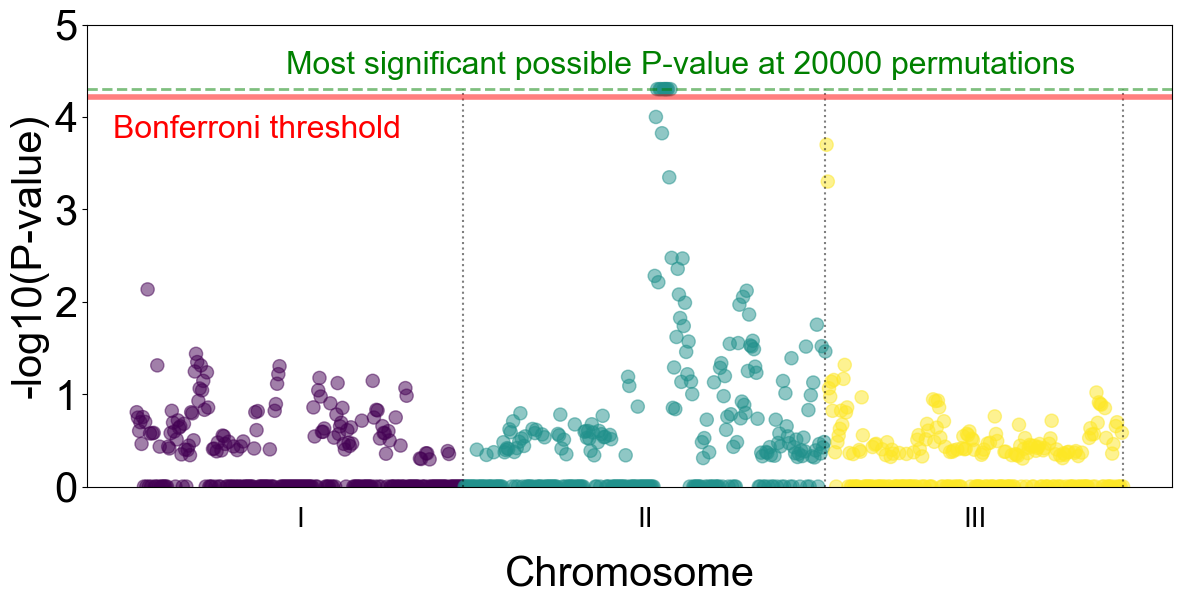

In [12]:
#plot p_val vs haplogroup, color by chr
fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(data['haplogroup'], data['-log10(pvalue)'], s=90, c=data['chr'], cmap='viridis',alpha=0.5)

ax.set_ylabel('-log10(P-value)', fontsize=30)
#remove x axis and instead label with chr
ax.set_xticks([])
#x label way below plot
ax.set_xlabel('Chromosome', fontsize=30, labelpad=50)
#plot extend until y=5
ax.set_ylim(0, 5)
#find center of values for each chr
chr_centers = data.groupby('chr').mean()
#round to integer
#label with chr
for i in range(1,4):
      ax.text(chr_centers.loc[i, 'haplogroup'], -0.5, data.loc[chr_centers["haplogroup"][i].round(0), 'roman'], ha='center', va='bottom', fontsize=20)
#draw a line at bonferroni threshold
bonf_threshold = -np.log10(0.05/len(data))
ax.axhline(bonf_threshold, color='red', linestyle='-', label='Bonferroni threshold', lw=4,alpha=0.5)
plt.text(100, bonf_threshold-0.5, 'Bonferroni threshold', ha='center', va='bottom', fontsize=23, color='red')
#draw a line at 1/20000
perm_threshold= -np.log10(1/20000)
ax.axhline(perm_threshold,  color='green', linestyle='--', label='1/20000', lw=2,alpha=0.5)
plt.text(450, perm_threshold+0.1, 'Most significant possible P-value at 20000 permutations', ha='center', va='bottom', fontsize=23, color='green')
#if any p_value below bonferroni threshold, label it
#draw dotted line between chr
#y tick font 30
plt.yticks(fontsize=30)
largest_haplogroup = data.groupby('chr').max()["haplogroup"]

for i in range(1,4):
      plt.vlines(largest_haplogroup[i], 0, perm_threshold, linestyles='dotted', colors='black', alpha=0.5)

#save as svg and as png to  root + Figures/All figures
plt.savefig(root + 'Figures/All figures/Manhattan plot.svg', dpi=400)
plt.savefig(root + 'Figures/All figures/Manhattan plot.png', dpi=400)



# EMM - P

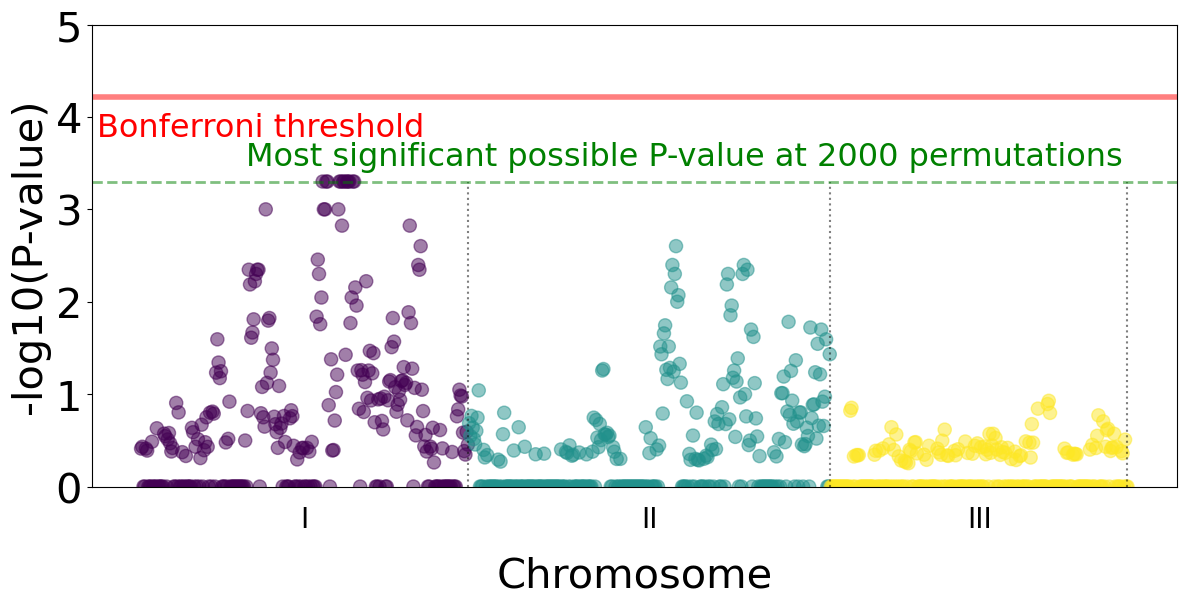

In [6]:
#load data /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Manhattan plot/data/dataresults_new_filtering.csv
data = pd.read_csv(root + 'Bence folder/Manhattan plot/dataresults_emm_p.csv', sep = ',',index_col=0)
#remove where haplogroup is na
data = data.dropna(subset=['haplogroup']).reset_index(drop=True)
#remove chromosome_ from the start of chr values
data['chr'] = data['chr'].str.replace('chromosome_', '')
#turn it into int
data['chr'] = data['chr'].astype(int)
#createa column of chr with roman
data["roman"] = data["chr"].map({1: "I", 2: "II", 3: "III"})
    
data = data.drop_duplicates(subset=['haplogroup'], keep='first').reset_index(drop=True)
#create column -log10(pvalue)
data['-log10(pvalue)'] = -np.log10(data['p_val'])
      
#plot p_val vs haplogroup, color by chr
fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(data['haplogroup'], data['-log10(pvalue)'], s=90, c=data['chr'], cmap='viridis',alpha=0.5)

ax.set_ylabel('-log10(P-value)', fontsize=30)
#remove x axis and instead label with chr
ax.set_xticks([])
#x label way below plot
ax.set_xlabel('Chromosome', fontsize=30, labelpad=50)
#plot extend until y=5
ax.set_ylim(0, 5)
#find center of values for each chr
chr_centers = data.groupby('chr').mean()
#round to integer
#label with chr
for i in range(1,4):
      ax.text(chr_centers.loc[i, 'haplogroup'], -0.5, data.loc[chr_centers["haplogroup"][i].round(0), 'roman'], ha='center', va='bottom', fontsize=20)
#draw a line at bonferroni threshold
bonf_threshold = -np.log10(0.05/len(data))
ax.axhline(bonf_threshold, color='red', linestyle='-', label='Bonferroni threshold', lw=4,alpha=0.5)
plt.text(100, bonf_threshold-0.5, 'Bonferroni threshold', ha='center', va='bottom', fontsize=23, color='red')
#draw a line at 1/20000
perm_threshold= -np.log10(1/2000)
ax.axhline(perm_threshold,  color='green', linestyle='--', label='1/2000', lw=2,alpha=0.5)
plt.text(450, perm_threshold+0.1, 'Most significant possible P-value at 2000 permutations', ha='center', va='bottom', fontsize=23, color='green')
#if any p_value below bonferroni threshold, label it
#draw dotted line between chr
#y tick font 30
plt.yticks(fontsize=30)
largest_haplogroup = data.groupby('chr').max()["haplogroup"]

for i in range(1,4):
      plt.vlines(largest_haplogroup[i], 0, perm_threshold, linestyles='dotted', colors='black', alpha=0.5)

#save as svg and as png to  root + Figures/All figures
plt.savefig(root + 'Figures/All figures/Manhattan plot emm_p.svg', dpi=400)
plt.savefig(root + 'Figures/All figures/Manhattan plot emm_p.png', dpi=400)



In [7]:
data

,haplogroup,chr,p_val,roman,-log10(pvalue)
0,1.0,1,0.3880,I,0.411168
1,2.0,1,0.3710,I,0.430626
2,3.0,1,1.0000,I,-0.000000
3,4.0,1,1.0000,I,-0.000000
4,5.0,1,0.3885,I,0.410609
...,...,...,...,...,...
811,812.0,3,0.4365,III,0.360016
812,813.0,3,1.0000,III,-0.000000
813,814.0,3,0.3105,III,0.507938
814,815.0,3,1.0000,III,-0.000000


In [9]:
#data where -log10(pvalue) > 3.5
data[data['-log10(pvalue)'] > 3]

,haplogroup,chr,p_val,roman,-log10(pvalue)
150,151.0,1,0.0005,I,3.30103
153,154.0,1,0.0005,I,3.30103
154,155.0,1,0.0005,I,3.30103
164,165.0,1,0.0005,I,3.30103
165,166.0,1,0.0005,I,3.30103
167,168.0,1,0.0005,I,3.30103
168,169.0,1,0.0005,I,3.30103
170,171.0,1,0.0005,I,3.30103
171,172.0,1,0.0005,I,3.30103
172,173.0,1,0.0005,I,3.30103
